In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


original size: (3106, 4667, 3)


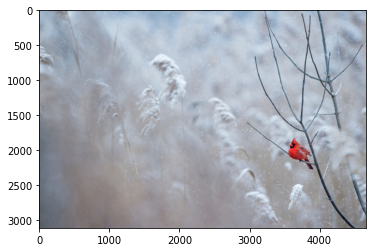

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("/content/drive/MyDrive/Năm 3/Xử lý hình ảnh/1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f"original size: {image.shape}")
plt.imshow(image)

Resized Dimensions :  (1552, 2333, 3)


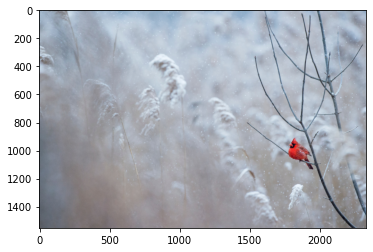

In [ ]:
h, w, c = image.shape
new_width = 2333
k = float(w) / h
dim = (new_width, int(new_width / k))
img_resized = cv2.resize(imgage, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',img_resized.shape)
plt.imshow(img_resized)
plt.show()

In [ ]:
# Введите коэффициент отношения исходной ширины изображения к его высоте:
print(img_resized.shape)
2333/img_resized.shape[0]

(1552, 2333, 3)


1.503221649484536

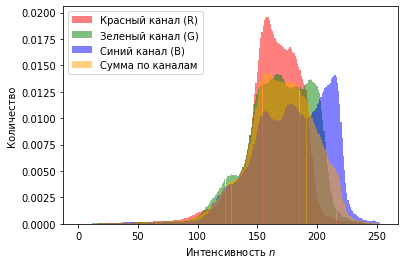

In [ ]:
#4 Постройте гистограмму сжатого изображения в палитре RGB. 
# Сравните оценку плотностей распределения интенсивностей по каналам R, G и B
# Введите наибольшее значение плотности среди трех каналов:

plt.hist(img_resized[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5,density=True)
plt.hist(img_resized[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
plt.hist(img_resized[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
plt.hist(img_resized.ravel(), bins = 256, color = 'orange', alpha = 0.5, density=True) 
plt.legend(['Красный канал (R)', 'Зеленый канал (G)', 'Cиний канал (B)','Сумма по каналам'])
plt.xlabel('Интенсивность $n$')
plt.ylabel('Количество')
plt.show()

0.01960727128045928

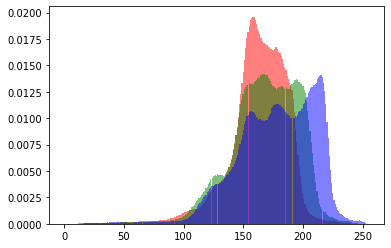

In [ ]:
x_red, _, _ = plt.hist(img_resized[:, :, 0].ravel(), bins = 256, color = 'Red', alpha = 0.5, density=True)
x_green, _, _ = plt.hist(img_resized[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5, density=True)
x_blue, _, _ = plt.hist(img_resized[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5, density=True)
max(x_red.max(), x_green.max(), x_blue.max())

In [ ]:
# 5. Выполните линейную нормировку и растяжение на диапазон 0-255 гистограммы по каналам R, G и B сжатого изображения.
# Определите интенсивность каналов R, G, B для пикселя, находящегося на пересечении 798 строки и 1136 столбца матричного 
# представления изображения.
RGB_img_new = img_resized.copy()

In [ ]:
# Normalization
RGB_img_new[:, :, 2] = (RGB_img_new[:, :, 2] - np.min(RGB_img_new[:, :, 2]))/(np.max(RGB_img_new[:, :, 2]) - np.min(RGB_img_new[:, :, 2]))*255
RGB_img_new[:, :, 0] = (RGB_img_new[:, :, 0] - np.min(RGB_img_new[:, :, 0]))/(np.max(RGB_img_new[:, :, 0]) - np.min(RGB_img_new[:, :, 0]))*255
RGB_img_new[:, :, 1] = (RGB_img_new[:, :, 1] - np.min(RGB_img_new[:, :, 1]))/(np.max(RGB_img_new[:, :, 1]) - np.min(RGB_img_new[:, :, 1]))*255

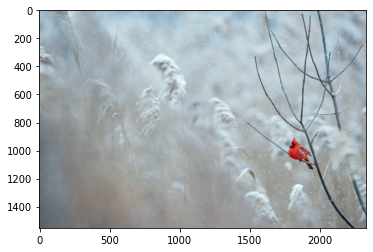

In [ ]:
plt.imshow(RGB_img_new)

In [ ]:
# Введите значения интенсивности через запятую для каналов R,G,B соответственно:
img_resized[797, 1135, :]

array([187, 197, 209], dtype=uint8)

In [ ]:
RGB_img_new[798][1136]  

array([188, 203, 209], dtype=uint8)

In [ ]:
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

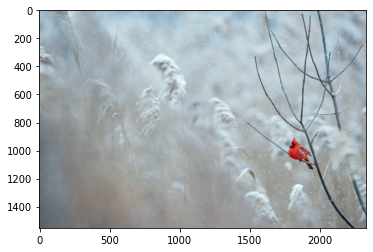

In [ ]:
plt.imshow(RGB_img_new)

In [ ]:
# Выполните вейвлет-преобразование Хаара для изображения полученного после шага 5.
wavelet = 'haar'
image = cv2.cvtColor(RGB_img_new, cv2.COLOR_BGR2GRAY)
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD) = c

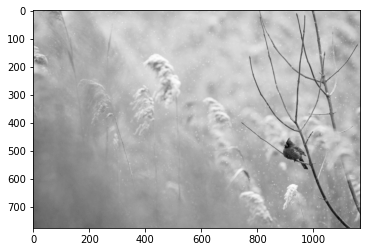

In [ ]:
plt.imshow(cA, cmap = 'gray')

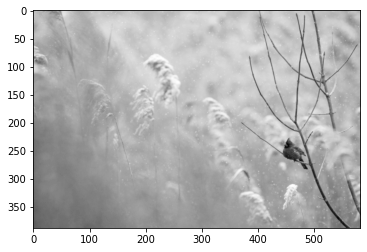

In [ ]:
# Выполните повторное вейвлет-преобразование Хаара для набора cA шага 6.
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)
plt.imshow(cA1, cmap = 'gray')

In [ ]:
cA1.shape

(388, 584)

In [ ]:
cA11 = cA1.copy()
cnt = 0
threshold=80
for idx, a in enumerate(cA11):
    for idy, k in enumerate(a):
        if cA11[idx][idy] < 80:
            cA11[idx][idy] = 0
            cnt += 1
cA11.sum()
print(cnt)

42
